In [2]:
import numpy as np
import pandas as pd
# import latexify
import seaborn as sns
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn import metrics
from plotly import graph_objects as go
from matplotlib.widgets import Slider

# Setup plots display
plt.style.use('fivethirtyeight')
%matplotlib widget

%config InlineBackend.figure_format = "retina"

# Setup

In [3]:
data_dir = Path("../data/")

## Plotting utils

### Matplotlib

In [4]:
def close_prev_figures():
    """Close all previous figures to clean up memory."""
    fignums = plt.get_fignums()
    if fignums:
        for fignum in fignums:
            plt.close(fignum)

# Problem definition

Say there are two variables which seem to be linearly related (like height and waight etc.). 
\
Meaning, if one variable goes up, so does the other - `positive correlation`, or 
\
if one variable goes up, the other tend to go down - `negative correlation`.


In [5]:
# Generate data
data_w = 1.5
data_b = 10

x_data = np.sort(np.random.choice(np.arange(0, 10, 0.1), size=30, replace=False))
y_data = x_data * data_w + np.random.randn(x_data.size).round(2) + data_b

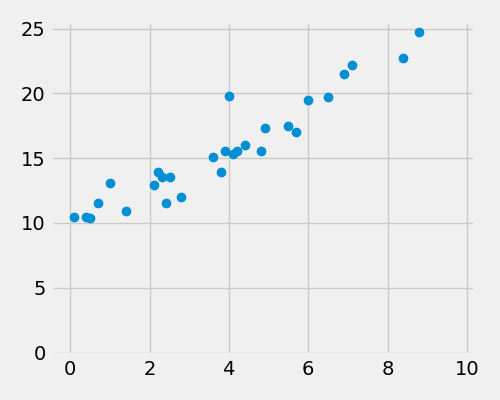

In [6]:
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(x_data, y_data, 'o')
ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

In [7]:
def linear_model(x, w=1, b=0):
    # TODO: add line formula to plots
    y = w * x + b
    return y

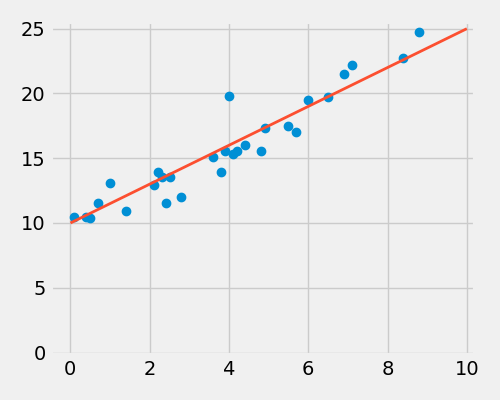

In [8]:
x_line_1 = np.array([0, 10])
y_line_1 = linear_model(x=x_line_1, w=data_w, b=data_b)

close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    x_data, y_data, 'o', 
    x_line_1, y_line_1, '-', linewidth=2
)

ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

The task is knowing value of one variable predict the value of the second one.
\
To do this we need a way to automatically find best model parameters in this case *weight* and *bias*

# Introducing Linear model (line equation)

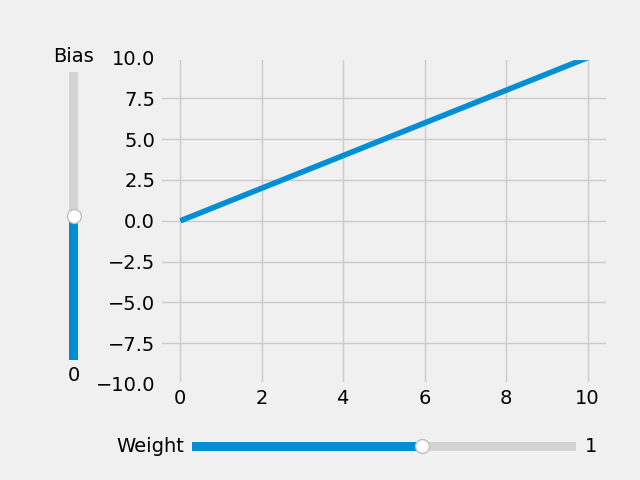

In [9]:
x_line = np.array([0, 10])
init_weight = 1
min_weight = -5
max_weight = 5

init_bias = 0
min_bias = -10
max_bias = 10

fig, ax = plt.subplots()
line, = ax.plot(x_line, linear_model(x=x_line))
ax.set_ylim(min_bias, max_bias)

# Make room for the sliders
fig.subplots_adjust(left=0.25, bottom=0.2)


# SETUP SLIDERS

# Weight slider (horizontal).
w_slider_x = 0.3
w_slider_y = 0.05
w_slider_len = 0.6
w_slider_width = 0.04

ax_weight = fig.add_axes([w_slider_x, w_slider_y, w_slider_len, w_slider_width])
weight_slider = Slider(
    ax=ax_weight,
    label='Weight',
    valmin=min_weight,
    valmax=max_weight,
    valinit=init_weight,
)

# Bias slider (vertical)
b_slider_x = 0.1
b_slider_y = 0.25
b_slider_len = 0.6
b_slider_width = 0.03

ax_bias = fig.add_axes([b_slider_x, b_slider_y, b_slider_width, b_slider_len])
bias_slider = Slider(
    ax=ax_bias,
    label="Bias",
    valmin=min_bias,
    valmax=max_bias,
    valinit=init_bias,
    orientation="vertical"
)

# The function to be called anytime a slider's value changes
def update(val):
    line.set_ydata(linear_model(x_line, w=weight_slider.val, b=bias_slider.val))
    fig.canvas.draw_idle()

# register the update function with each slider
weight_slider.on_changed(update)
bias_slider.on_changed(update)

plt.show()


# Defining `Loss Function`

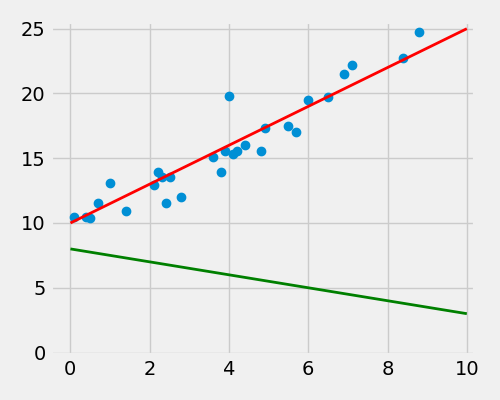

In [10]:
line_2_w = -0.5
line_2_b = 8

x_line_2 = x_line_1
y_line_2 = linear_model(x_line_2, w=line_2_w, b=line_2_b)

close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    x_data, y_data, 'o', 
    x_line_1, y_line_1, 'r-',
    x_line_2, y_line_2, 'g-', linewidth=2,
)

ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

In order to be able to find best possible line automatically we need to have a measure of how good our line fits the data.
One of the most obvious and easy ways is to sum differences between true and predicted values of the target variable. 

In [11]:
residuals = []
for x_val, y_true in zip(x_data, y_data):
    x_val, y_true = round(x_val, 2), round(y_true, 2)
    # add 'x' coordinates (equal values to plot vertical line)
    residuals.append([x_val, x_val])
    # add 'y' coordinates
    y_pred = linear_model(x_val, w=data_w, b=data_b)
    residuals.append([y_pred, y_true])
    # add line color
    residuals.append('black')

residuals[:6]

[[0.1, 0.1], [10.15, 10.49], 'black', [0.4, 0.4], [10.6, 10.49], 'black']

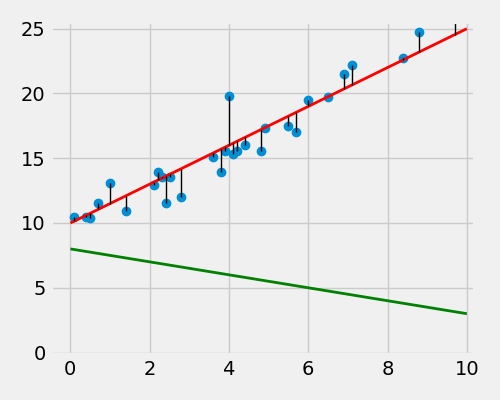

In [12]:
close_prev_figures()
fig, ax = plt.subplots(figsize=(5, 4))
ax.plot(
    x_data, y_data, 'o', 
    x_line_1, y_line_1, 'r-',
    x_line_2, y_line_2, 'g-', linewidth=2,
)
ax.plot(*residuals, linewidth=1)

ax.set_xlim(-0.5, 10.2)
ax.set_ylim(-0.2, 25.5)
plt.tight_layout()
plt.show()

In [13]:
# Define `total_error` loss
def mean_absolute_error(y_true, y_pred):
    
    assert len(y_true) == len(y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.abs(y_true - y_pred).sum() / y_true.size

In [14]:
y_pred = linear_model(x_data, w=data_w, b=data_b)
mae_error = mean_absolute_error(y_data, y_pred)
mae_error

0.9246666666666667

In [15]:
y_pred = linear_model(x_data, w=line_2_w, b=line_2_b)
mae_error = mean_absolute_error(y_data, y_pred)
mae_error

9.998

# Fitting the line

## Simple iterative method

### 2 variables

In [16]:
def fit_line(x, y, learning_rate=0.5, fit_weight=False, fit_bias=False, steps=30):
    if not fit_weight and not fit_bias:
        raise ValueError("At least one of 'fit_weight' or 'fit_bias' must be 'True'!!!")

    best_w = 0
    best_b = 0
    best_y_pred = linear_model(x, w=best_w, b=best_b)
    best_error = mean_absolute_error(y, best_y_pred)

    lr = learning_rate
    increase_weight = True
    increase_bias = True
    history = [[best_w, best_b, best_error]]
    for step in range(steps):
        if fit_weight:
        # Step optimizeing weight
            if increase_weight:
                new_w = best_w + lr
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                else:
                    increase_weight = False

            else:
                new_w = best_w - lr
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                else:
                    increase_weight = True
        
        if fit_bias:
        # Step optimizeing bias
            if increase_bias:
                new_b = best_b + lr
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                else:
                    increase_bias = False

            else:
                new_b = best_b - lr
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                else:
                    increase_bias = True

        # Add updated parameters to the training history
        w_b_error = [round(num, 2) for num in [best_w, best_b, best_error]]
        history.append(w_b_error)
        
    return history

In [17]:
history_b = fit_line(x_data, y_data, fit_bias=True, steps=50)
history_w = fit_line(x_data, y_data, learning_rate=0.2, fit_weight=True)
history_wb = fit_line(x_data, y_data, learning_rate=0.2, fit_weight=True, fit_bias=True, steps=50)

In [18]:
def plot_linear_regression_train_history(history, x, y, alpha=1):
    init_step = 0
    x_line = np.array([min(x), max(x)])

    steps = list(range(len(history)))
    errors = [h[2] for h in history]
    max_error = max(errors)

    init_w, init_b, init_error = history[init_step]
    init_y_pred = linear_model(x_line, w=init_w, b=init_b)

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    data_line, = ax1.plot(x, y, "o", alpha=alpha)
    fit_line, = ax1.plot(x_line, init_y_pred)

    error_line, = ax2.plot(steps, errors)
    step_line, = ax2.plot([init_step, init_step], [0, max_error], linewidth=2)

    # SETUP SLIDERS

    # Make room for the sliders
    fig.subplots_adjust(left=0, bottom=0.2)

    # Epoch slider (horizontal).
    w_slider_x = 0.3
    w_slider_y = 0.05
    w_slider_len = 0.6
    w_slider_width = 0.04

    ax_step_slider = fig.add_axes([w_slider_x, w_slider_y, w_slider_len, w_slider_width])
    step_slider = Slider(
        ax=ax_step_slider,
        label='Step',
        valmin=min(steps),
        valmax=max(steps),
        valinit=init_step,
        valstep=steps,
    )

    # The function to be called anytime a slider's value changes
    def update(val):
        step = int(step_slider.val)
        w = history[step][0]
        b = history[step][1]        
        fit_line.set_ydata(linear_model(x_line, w=w, b=b))
        step_line.set_xdata([step, step])
        fig.canvas.draw_idle()

    # register the update function with each slider
    step_slider.on_changed(update)

    plt.show()

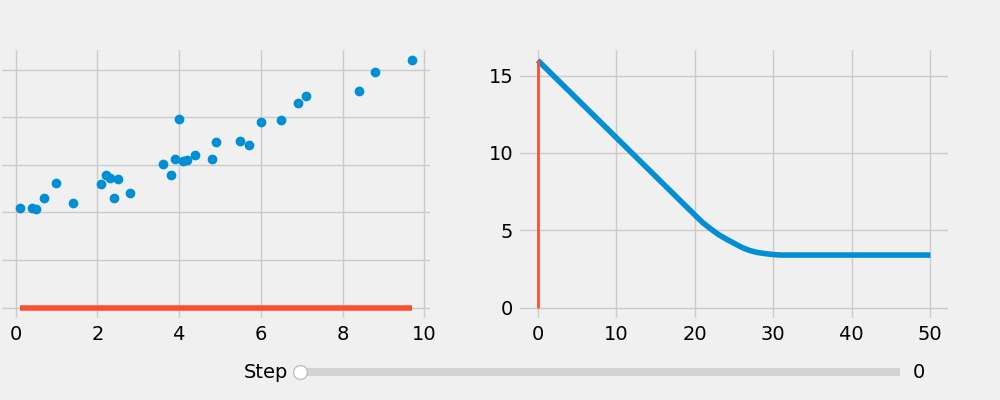

In [19]:
close_prev_figures()
plot_linear_regression_train_history(history_b, x_data, y_data)

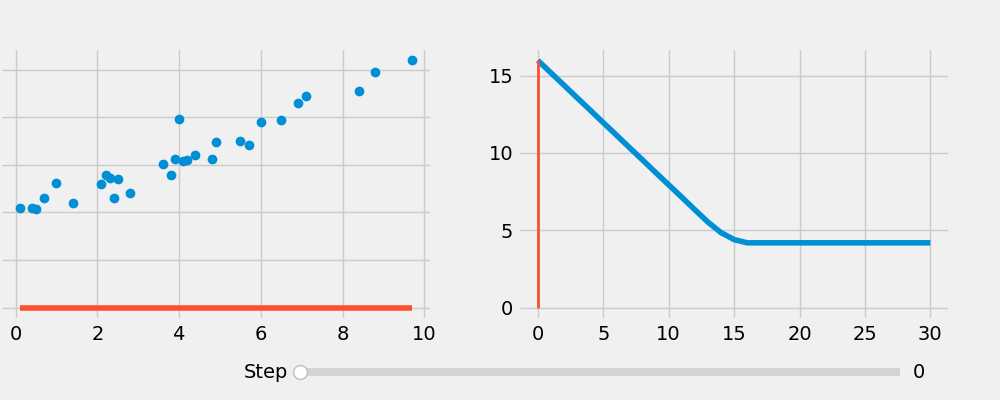

In [20]:
close_prev_figures()
plot_linear_regression_train_history(history_w, x_data, y_data)

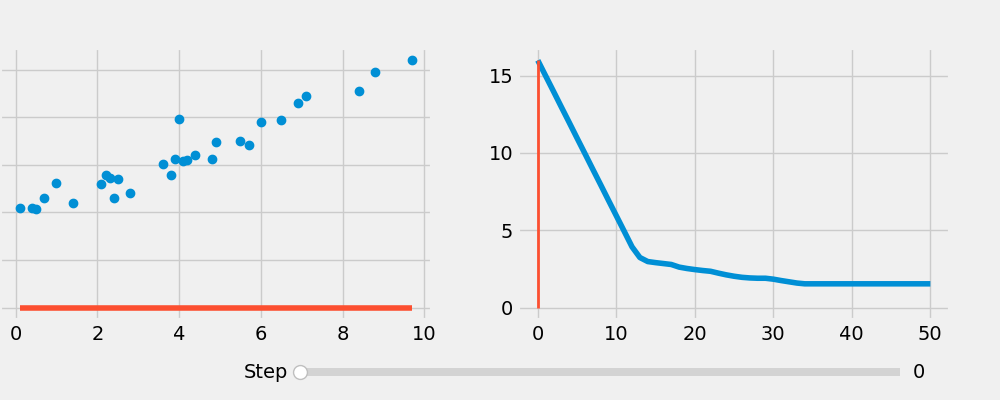

In [21]:
close_prev_figures()
plot_linear_regression_train_history(history_wb, x_data, y_data)

#### Adjust learning rate

In [22]:
def fit_line_dynamic_learning_rate(x, y, init_lr=2, fit_weight=False, fit_bias=False, steps=30):
    if not fit_weight and not fit_bias:
        raise ValueError("At least one of 'fit_weight' or 'fit_bias' must be 'True'!!!")

    best_w = 0
    best_b = 0
    best_y_pred = linear_model(x, w=best_w, b=best_b)
    steps_w_not_improved = 0
    steps_b_not_improved = 0

    best_error = mean_absolute_error(y, best_y_pred)
    lr_w = init_lr
    lr_b = init_lr

    increase_weight = True
    increase_bias = True
    history = [[best_w, best_b, best_error]]
    for step in range(steps):
        if fit_weight:
        # Step optimizeing weight
            if increase_weight:
                new_w = best_w + lr_w
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                    steps_w_not_improved = 0
                else:
                    increase_weight = False
                    steps_w_not_improved += 1

            else:
                new_w = best_w - lr_w
                new_y_pred = linear_model(x_data, w=new_w, b=best_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_w = new_w
                    best_error = new_error
                    steps_w_not_improved = 0
                else:
                    increase_weight = True
                    steps_w_not_improved += 1
        
        if fit_bias:
        # Step optimizeing bias
            if increase_bias:
                new_b = best_b + lr_b
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)
                
                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                    steps_b_not_improved = 0
                else:
                    increase_bias = False
                    steps_b_not_improved += 1

            else:
                new_b = best_b - lr_b
                new_y_pred = linear_model(x_data, w=best_w, b=new_b)
                new_error = mean_absolute_error(y_data, new_y_pred)

                if new_error < best_error:
                    best_b = new_b
                    best_error = new_error
                    steps_b_not_improved = 0
                else:
                    increase_bias = True
                    steps_b_not_improved += 1
        
        if steps_w_not_improved >= 2:
            lr_w /= 2
            steps_w_not_improved = 0

        if steps_b_not_improved >= 2:
            lr_b /= 2
            steps_b_not_improved = 0

        # Add updated parameters to the training history
        w_b_error = [round(num, 2) for num in [best_w, best_b, best_error]]
        history.append(w_b_error)
        
    return history

In [23]:
history_w = fit_line_dynamic_learning_rate(x_data, y_data, fit_weight=True)
history_b = fit_line_dynamic_learning_rate(x_data, y_data, fit_bias=True)
history_wb = fit_line_dynamic_learning_rate(x_data, y_data, fit_weight=True, fit_bias=True)

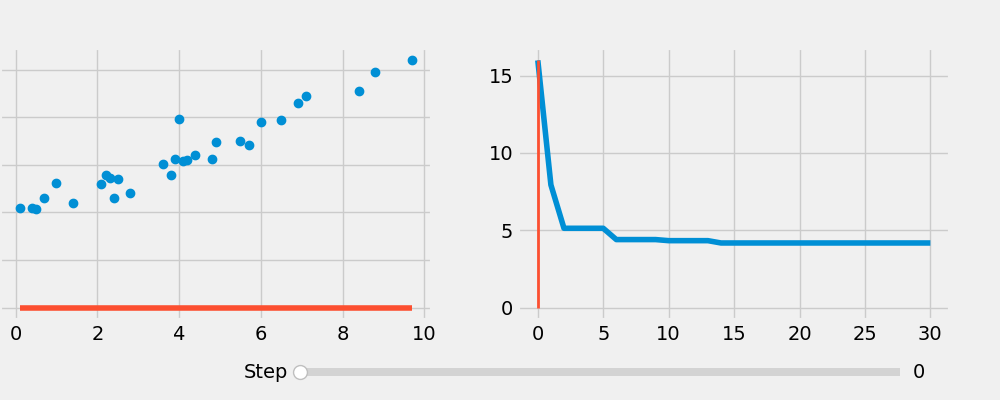

In [24]:
plot_linear_regression_train_history(history_w, x_data, y_data)

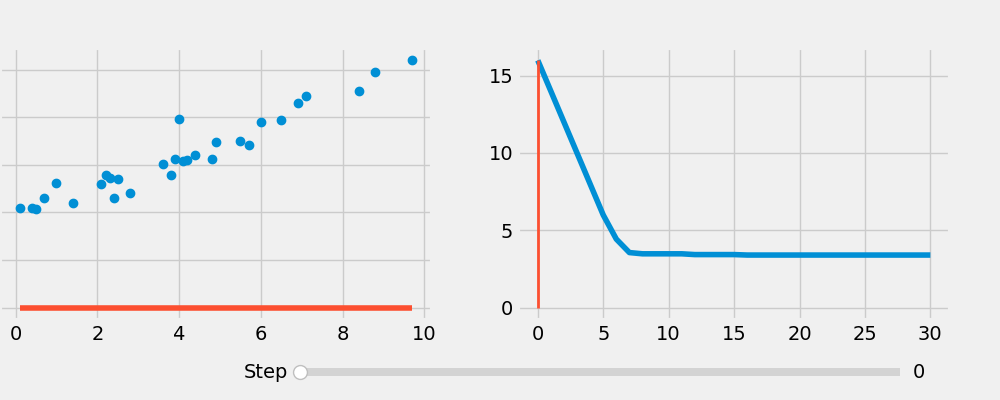

In [25]:
plot_linear_regression_train_history(history_b, x_data, y_data)

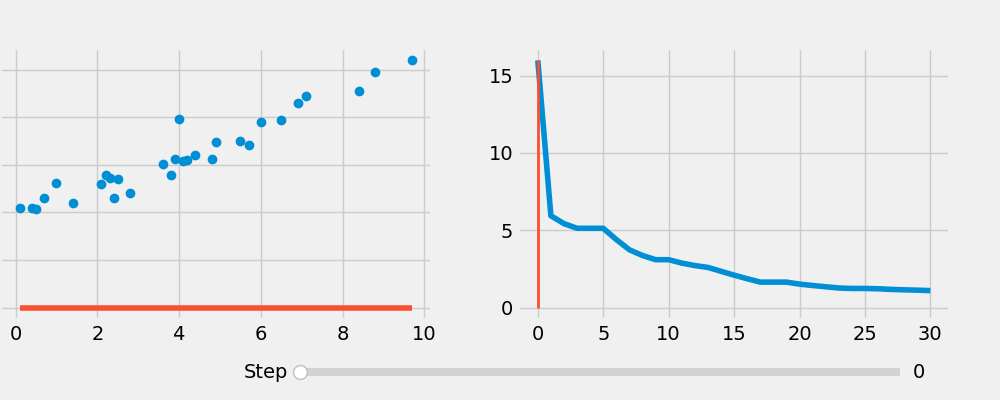

In [26]:
plot_linear_regression_train_history(history_wb, x_data, y_data)

In [27]:
class FitLineBasic:
    def __init__(self, learning_rate=1):
        # Initialize parameters
        self.w = 0
        self.b = 0
        self.lr_w = learning_rate
        self.lr_b = learning_rate
        self.increase_weight = True
        self.increase_bias = True
        self.history = []

    def change_param_direction(self, name):

        if name == 'weight':
            self.increase_weight = not self.increase_weight

        elif name == 'bias':
            self.increase_bias = not self.increase_bias

        else:
            raise ValueError(f"Invalid value of argument `name`, \
                             expected values: 'weight', 'bias'. Received - {name}")
    
    
    def bool_to_sign(self, bool_val: bool):
        """Return 1 if `bool_val` is True and -1 if `bool_val` is False."""
        assert isinstance(bool_val, bool)

        return -1 + 2 * bool_val
    
    
    def linear_model(self, x: np.ndarray, w=None, b=None):

        w = w if w is not None else self.w
        b = b if b is not None else self.b

        return x * w + b
    
    
    def fit(self, x, y, steps=30, fit_weight=False, fit_bias=False): # fit_parameters=['w', 'b']
        if not fit_weight and not fit_bias:
            raise ValueError("At least one of 'fit_weight' or 'fit_bias' must be 'True'!!!")
        
        steps_w_not_improved = 0
        steps_b_not_improved = 0

        y_pred = self.linear_model(x)
        error = mean_absolute_error(y, y_pred)

        self.history.append([self.w, self.b, error])

        for step in range(steps):
            if fit_weight:
                lr_sign = self.bool_to_sign(self.increase_weight)
                new_w = self.w  + lr_sign * self.lr_w
                y_pred = self.linear_model(x, w=new_w)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.w = new_w
                    error = new_error
                    steps_w_not_improved = 0
                else:
                    self.change_param_direction('weight')
                    steps_w_not_improved += 1

            if fit_bias:
                lr_sign = self.bool_to_sign(self.increase_bias)
                new_b = self.b  + lr_sign * self.lr_b
                y_pred = self.linear_model(x, b=new_b)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.b = new_b
                    error = new_error
                    steps_b_not_improved = 0
                else:
                    self.change_param_direction('bias')
                    steps_b_not_improved += 1

            if steps_w_not_improved >= 2:
                self.lr_w /= 2
                steps_w_not_improved = 0

            if steps_b_not_improved >= 2:
                self.lr_b /= 2
                steps_b_not_improved = 0

            # Add updated parameters to the training history
            w_b_error = [round(num, 2) for num in [self.w, self.b, error]]
            self.history.append(w_b_error)

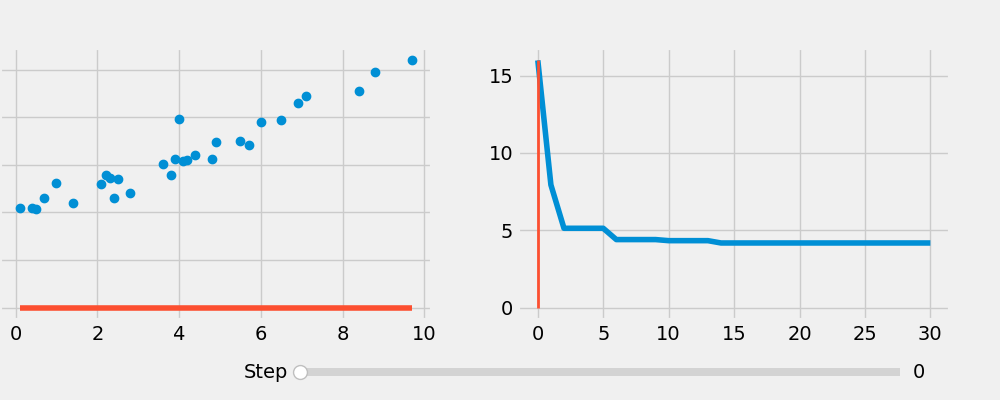

In [28]:
close_prev_figures()

reg = FitLineBasic(learning_rate=2)
reg.fit(x_data, y_data, fit_weight=True)
history_w = reg.history

plot_linear_regression_train_history(history_w, x_data, y_data)

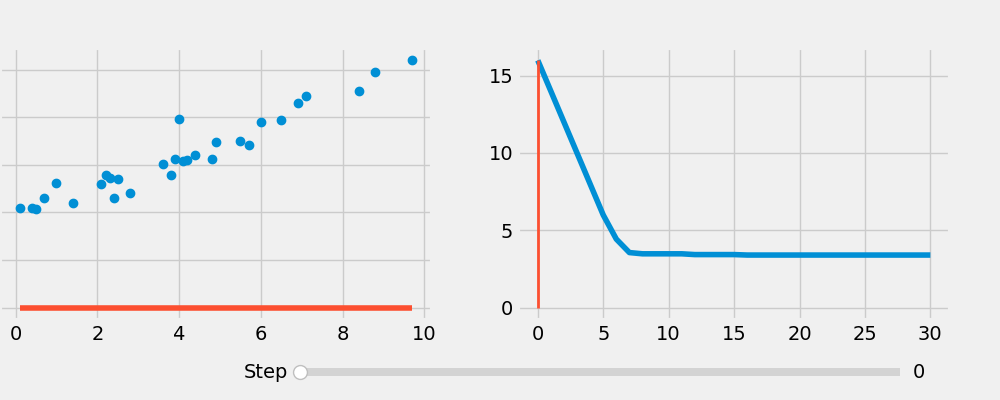

In [29]:
reg = FitLineBasic(learning_rate=2)
reg.fit(x_data, y_data, fit_bias=True)
history_b = reg.history

plot_linear_regression_train_history(history_b, x_data, y_data)

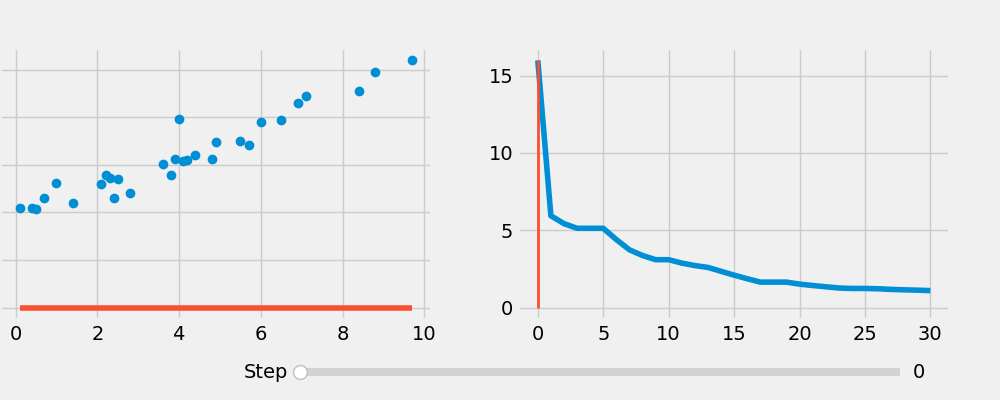

In [30]:
reg = FitLineBasic(learning_rate=2)
reg.fit(x_data, y_data, fit_weight=True, fit_bias=True)
history_wb = reg.history

plot_linear_regression_train_history(history_wb, x_data, y_data)

### 3 Variables

#### Problem setup

In [31]:
def set_3d_labels(ax, x_label="X", y_label="Y", z_label="Z"):
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_zlabel(z_label)

In [32]:
# Generate data
w1 = 3
w2 = 2
b = 10

size = 50
x1 = np.sort(np.random.choice(np.arange(0, 10, 0.1), size=size, replace=False))
x2 = np.random.choice(np.arange(0, 10, 0.1), size=size, replace=False)
y = x1 * w1 + x2 * w2 + np.random.randn(size).round(2)*3 + b

In [33]:
xv1, xv2 = np.meshgrid((x1[0], x1[-1]), (min(x2), max(x2)))
yv = xv1 * w1 + xv2 * w2 + b

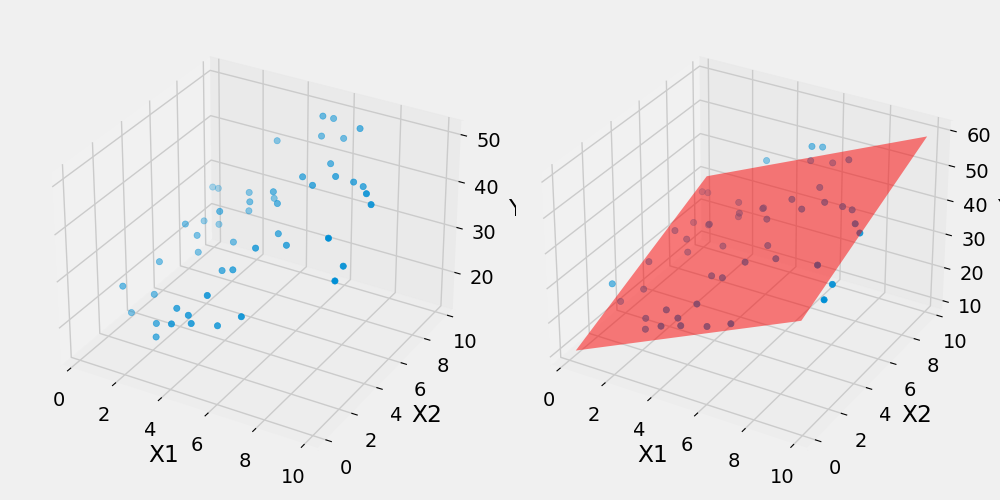

In [34]:
close_prev_figures()

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x1, x2, y, marker="o")
set_3d_labels(ax1, "X1", "X2", "Y")

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x1, x2, y, marker="o")
ax2.plot_surface(xv1, xv2, yv, color="r", alpha=0.5)
set_3d_labels(ax2, "X1", "X2", "Y")

plt.tight_layout()
plt.show()

#### Update basic model

In [35]:
class FitLineBasic3D:
    # TODO: Update history to dict
    # TODO: Add early stopping
    
    def __init__(self, lr_w1=1, lr_w2=1, lr_b=1):
        # Initialize parameters
        self.w1 = 0
        self.w2 = 0
        self.b = 0

        self.lr_w1 = lr_w1
        self.lr_w2 = lr_w2
        self.lr_b = lr_b

        self.increase_w1 = True
        self.increase_w2 = True
        self.increase_bias = True
        
        self.history = []

    def change_param_direction(self, name):

        if name == 'w1':
            self.increase_w1 = not self.increase_w1

        elif name == 'w2':
            self.increase_w2 = not self.increase_w2

        elif name == 'bias':
            self.increase_bias = not self.increase_bias

        else:
            raise ValueError(f"Invalid value of argument `name`, \
                             expected values: 'w1', 'w2', 'bias'. Received - {name}")
    
    
    def bool_to_sign(self, bool_val: bool):
        """Return 1 if `bool_val` is True and -1 if `bool_val` is False."""
        assert isinstance(bool_val, bool)

        return -1 + 2 * bool_val
    
    
    def linear_model(self, x1: np.ndarray, x2: np.ndarray, w1=None, w2=None, b=None):

        w1 = w1 if w1 is not None else self.w1
        w2 = w2 if w2 is not None else self.w2
        b = b if b is not None else self.b

        return (x1 * w1) + (x2 * w2) + b
    
    
    def fit(self, x1, x2, y, steps=30, fit_w1=False, fit_w2=False, fit_bias=False): # fit_parameters=['w1', 'w2', 'b']
        
        if not any([fit_w1, fit_w2, fit_bias]):
            raise ValueError("At least one of 'fit_w1', 'fit_w2' or 'fit_bias' must be 'True'!!!")
        
        steps_w1_not_improved = 0
        steps_w2_not_improved = 0
        steps_b_not_improved = 0

        y_pred = self.linear_model(x1, x2)
        error = mean_absolute_error(y, y_pred)

        self.history.append([self.w1, self.w2, self.b, error])

        for step in range(steps):
            if fit_w1:
                lr_sign = self.bool_to_sign(self.increase_w1)
                new_w1 = self.w1 + lr_sign * self.lr_w1
                y_pred = self.linear_model(x1, x2, w1=new_w1)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.w1 = new_w1
                    error = new_error
                    steps_w1_not_improved = 0
                else:
                    self.change_param_direction('w1')
                    steps_w1_not_improved += 1

            if fit_w2:
                lr_sign = self.bool_to_sign(self.increase_w2)
                new_w2 = self.w2  + lr_sign * self.lr_w2
                y_pred = self.linear_model(x1, x2, w2=new_w2)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.w2 = new_w2
                    error = new_error
                    steps_w2_not_improved = 0
                else:
                    self.change_param_direction('w2')
                    steps_w2_not_improved += 1

            if fit_bias:
                lr_sign = self.bool_to_sign(self.increase_bias)
                new_b = self.b  + lr_sign * self.lr_b
                y_pred = self.linear_model(x1, x2, b=new_b)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.b = new_b
                    error = new_error
                    steps_b_not_improved = 0
                else:
                    self.change_param_direction('bias')
                    steps_b_not_improved += 1

            if steps_w1_not_improved >= 2:
                self.lr_w1 /= 2
                steps_w1_not_improved = 0

            if steps_w2_not_improved >= 2:
                self.lr_w2 /= 2
                steps_w2_not_improved = 0

            if steps_b_not_improved >= 2:
                self.lr_b /= 2
                steps_b_not_improved = 0

            # Add updated parameters to the training history
            w_b_error = [round(num, 2) for num in [self.w1, self.w2, self.b, error]]
            self.history.append(w_b_error)

#### Update history plotting

In [36]:
def plot_linear_regression_train_history_3d(history, x1, x2, y, title="", plot_perfect_fit=True):
    HISTORY_ERROR_ID = 3

    init_step = 0
    x1_lims = np.array([min(x1), max(x1)])
    x2_lims = np.array([min(x2), max(x2)])

    xv1, xv2 = np.meshgrid(x1_lims, x2_lims)
    y_target = xv1 * w1 + xv2 * w2 + b

    steps = list(range(len(history)))
    errors = [h[HISTORY_ERROR_ID] for h in history]
    max_error = max(errors)

    init_w1, init_w2, init_b, init_error = history[init_step]
    init_y_pred = FitLineBasic3D().linear_model(xv1, xv2, w1=init_w1, w2=init_w2, b=init_b)

    fig = plt.figure(figsize=(10, 4))
    ax1 = fig.add_subplot(121, projection='3d')

    ax1.scatter(x1, x2, y, marker="o")
    if plot_perfect_fit:
        ax1.plot_surface(xv1, xv2, y_target, color="r", alpha=0.5)
    fit_plane = ax1.plot_surface(xv1, xv2, init_y_pred, color="g", alpha=0.5)

    ax2 = fig.add_subplot(122)
    error_line, = ax2.plot(steps, errors)
    step_line, = ax2.plot([init_step, init_step], [0, max_error], linewidth=2)

    # SETUP SLIDERS

    # Make room for the sliders
    fig.subplots_adjust(left=0, bottom=0.2)

    # Epoch slider (horizontal).
    w_slider_x = 0.3
    w_slider_y = 0.05
    w_slider_len = 0.6
    w_slider_width = 0.04

    ax_step_slider = fig.add_axes([w_slider_x, w_slider_y, w_slider_len, w_slider_width])
    step_slider = Slider(
        ax=ax_step_slider,
        label='Step',
        valmin=min(steps),
        valmax=max(steps),
        valinit=init_step,
        valstep=steps,
    )

    # The function to be called anytime a slider's value changes
    def update(val):
        step = int(step_slider.val)
        w1 = history[step][0]
        w2 = history[step][1]
        b = history[step][2]

        y_pred = FitLineBasic3D().linear_model(xv1, xv2, w1=w1, w2=w2, b=b)
        verts = []
        for i in range(len(xv1)):
            for vert in zip(xv1[i], xv2[i], y_pred[i]):
                verts.append(vert)

        fit_plane.set_verts(verts)
        step_line.set_xdata([step, step])
        fig.canvas.draw_idle()

    # register the update function with each slider
    step_slider.on_changed(update)

    fig.suptitle(title)
    plt.show()

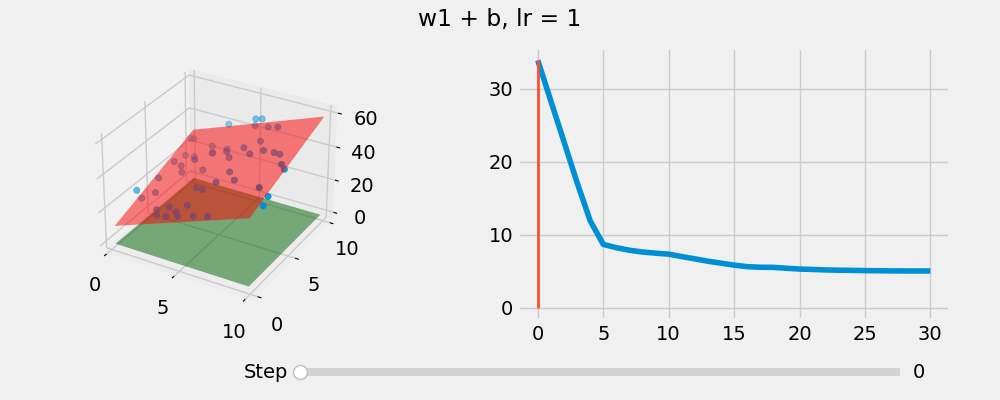

/home/oleh/miniconda3/envs/mlfs/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/oleh/miniconda3/envs/mlfs/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [37]:
close_prev_figures()

reg3d = FitLineBasic3D()
reg3d.fit(x1=x1, x2=x2, y=y, fit_w1=True, fit_w2=False, fit_bias=True)

plot_linear_regression_train_history_3d(reg3d.history, x1, x2, y, title="w1 + b, lr = 1")

In [38]:
reg3d.w1, reg3d.w2, reg3d.b

(2.75, 0, 21.25)

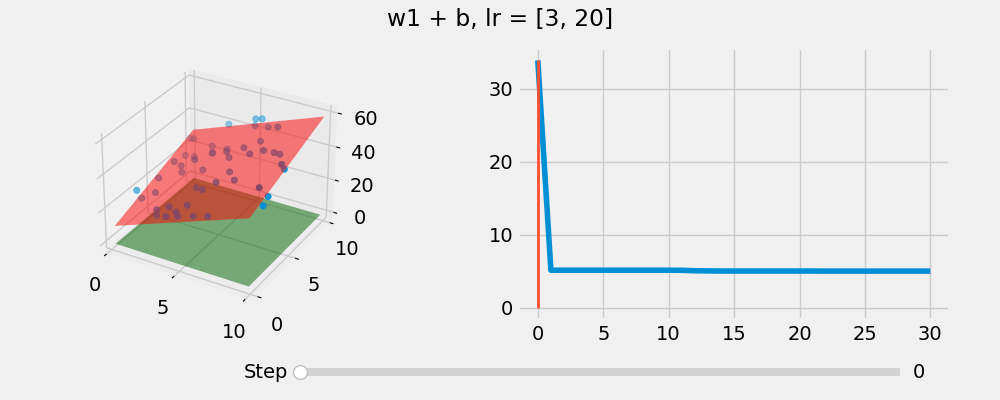

In [39]:
close_prev_figures()

lr_w1=3
lr_b=20

reg3d = FitLineBasic3D(lr_w1=lr_w1, lr_b=lr_b)
reg3d.fit(x1=x1, x2=x2, y=y, fit_w1=True, fit_w2=False, fit_bias=True)

plot_linear_regression_train_history_3d(reg3d.history, x1, x2, y, title=f"w1 + b, lr = [{lr_w1}, {lr_b}]")

In [40]:
reg3d.lr_w1, reg3d.lr_w2, reg3d.lr_b

(0.0029296875, 1, 0.0048828125)

In [41]:
reg3d.w1, reg3d.w2, reg3d.b

(2.7041015625, 0, 21.484375)

As we can see, to achieve good results in fewer steps we need to adjust learning rate separtely for each parameter.
But before that, let's first generalize regression model to work with arbitrary number of dimensions.

### N variables

#### Explore real data

In [42]:
from sklearn.datasets import fetch_california_housing

In [46]:
msg = "DATASET DESCRIPTION"
print(msg)
print("_" * len(msg))
print(fetch_california_housing(data_home=str(data_dir)).DESCR)

DATASET DESCRIPTION
___________________
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dolla

In [48]:
X, y = fetch_california_housing(data_home=str(data_dir), return_X_y=True, as_frame=True)

Let's exclude `Latitude` and `Longitude` for now

In [49]:
X = X.drop(columns=["Latitude", "Longitude"])
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


/home/oleh/miniconda3/envs/mlfs/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_47503/1339417334.py:3: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


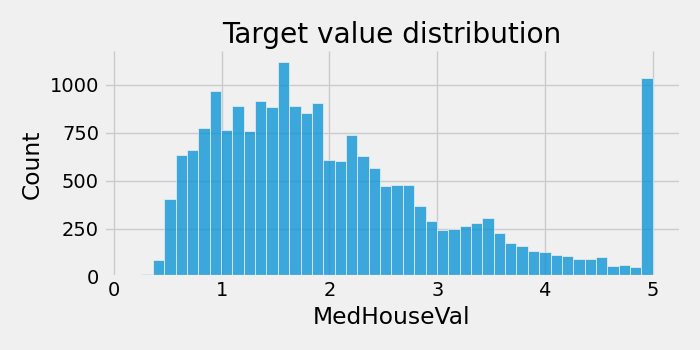

In [50]:
dplot = sns.displot(y, height=3.5, aspect=2)
dplot.set(title="Target value distribution")
plt.tight_layout()

#### Test 1 variable based model

1 var MAE: 0.6354993607527858


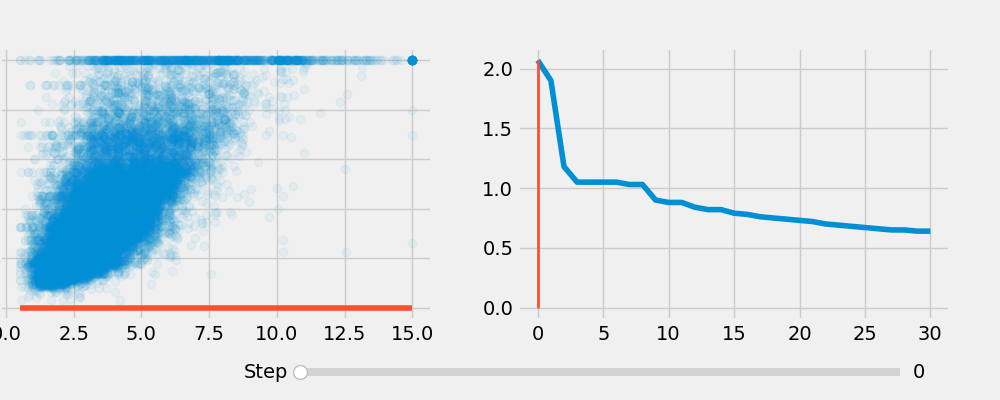

In [51]:
reg = FitLineBasic()
reg.fit(x=X["MedInc"], y=y, fit_weight=True, fit_bias=True)

y_pred = reg.linear_model(x=X["MedInc"])
mae = mean_absolute_error(y, y_pred)

print("1 var MAE:", mae)
plot_linear_regression_train_history(reg.history, x=X["MedInc"], y=y, alpha=0.05)

#### Test 2 variable based model

1 var MAE: 0.6028761341649379


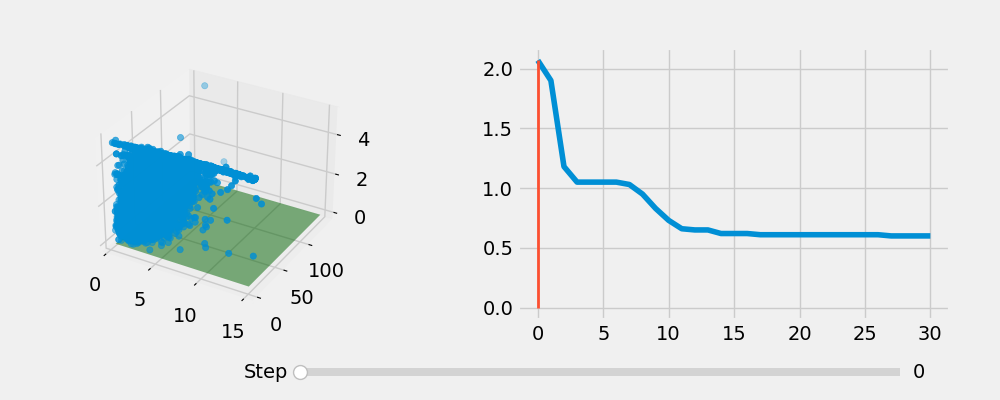

/home/oleh/miniconda3/envs/mlfs/lib/python3.10/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/oleh/miniconda3/envs/mlfs/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [52]:
reg3d = FitLineBasic3D()
reg3d.fit(x1=X["MedInc"], x2=X["AveRooms"], y=y, fit_w1=True, fit_w2=True, fit_bias=True)

y_pred = reg3d.linear_model(x1=X["MedInc"], x2=X["AveRooms"])
mae = mean_absolute_error(y, y_pred)

print("1 var MAE:", mae)
plot_linear_regression_train_history_3d(reg3d.history, x1=X["MedInc"], x2=X["AveRooms"], y=y, plot_perfect_fit=False)

#### Implement vectorized N variables LinRegression

Let's use numpy arrays for storing weights and make sure our code works for arbitrary number of inputs.

In [53]:
class LinearRegressionNdimDivOpt:
    """
    Linear Regression for fitting N-dimensional plane with division based optimization 
    (if loss not decreases after some number of steps, devide learning rate in half)
    """

    def __init__(self):
        pass

    def init_params(self, n_params):
        self.w = np.zeros(n_params)
        self.b = 0

    def change_param_direction(self):
        pass

    def forward(self, x):
        return np.matmul(x, self.w) + self.b

    def fit(self, x, y, loss, x_val=None, y_val=None, epochs=30):

        self.init_params(n_params=x.shape[-1])

        for epoch in range(epochs):
            pass

In [54]:
class FitLineBasic3D:
    # TODO: Update history to dict
    # TODO: Add early stopping
    
    def __init__(self, lr_w1=1, lr_w2=1, lr_b=1):
        # Initialize parameters
        self.w1 = 0
        self.w2 = 0
        self.b = 0

        self.lr_w1 = lr_w1
        self.lr_w2 = lr_w2
        self.lr_b = lr_b

        self.increase_w1 = True
        self.increase_w2 = True
        self.increase_bias = True
        
        self.history = []

    def change_param_direction(self, name):

        if name == 'w1':
            self.increase_w1 = not self.increase_w1

        elif name == 'w2':
            self.increase_w2 = not self.increase_w2

        elif name == 'bias':
            self.increase_bias = not self.increase_bias

        else:
            raise ValueError(f"Invalid value of argument `name`, \
                             expected values: 'w1', 'w2', 'bias'. Received - {name}")
    
    
    def bool_to_sign(self, bool_val: bool):
        """Return 1 if `bool_val` is True and -1 if `bool_val` is False."""
        assert isinstance(bool_val, bool)

        return -1 + 2 * bool_val
    
    
    def linear_model(self, x1: np.ndarray, x2: np.ndarray, w1=None, w2=None, b=None):

        w1 = w1 if w1 is not None else self.w1
        w2 = w2 if w2 is not None else self.w2
        b = b if b is not None else self.b

        return (x1 * w1) + (x2 * w2) + b
    
    
    def fit(self, x1, x2, y, steps=30, fit_w1=False, fit_w2=False, fit_bias=False): # fit_parameters=['w1', 'w2', 'b']
        
        if not any([fit_w1, fit_w2, fit_bias]):
            raise ValueError("At least one of 'fit_w1', 'fit_w2' or 'fit_bias' must be 'True'!!!")
        
        steps_w1_not_improved = 0
        steps_w2_not_improved = 0
        steps_b_not_improved = 0

        y_pred = self.linear_model(x1, x2)
        error = mean_absolute_error(y, y_pred)

        self.history.append([self.w1, self.w2, self.b, error])

        for step in range(steps):
            if fit_w1:
                lr_sign = self.bool_to_sign(self.increase_w1)
                new_w1 = self.w1 + lr_sign * self.lr_w1
                y_pred = self.linear_model(x1, x2, w1=new_w1)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.w1 = new_w1
                    error = new_error
                    steps_w1_not_improved = 0
                else:
                    self.change_param_direction('w1')
                    steps_w1_not_improved += 1

            if fit_w2:
                lr_sign = self.bool_to_sign(self.increase_w2)
                new_w2 = self.w2  + lr_sign * self.lr_w2
                y_pred = self.linear_model(x1, x2, w2=new_w2)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.w2 = new_w2
                    error = new_error
                    steps_w2_not_improved = 0
                else:
                    self.change_param_direction('w2')
                    steps_w2_not_improved += 1

            if fit_bias:
                lr_sign = self.bool_to_sign(self.increase_bias)
                new_b = self.b  + lr_sign * self.lr_b
                y_pred = self.linear_model(x1, x2, b=new_b)
                new_error = mean_absolute_error(y, y_pred)

                if new_error < error:
                    self.b = new_b
                    error = new_error
                    steps_b_not_improved = 0
                else:
                    self.change_param_direction('bias')
                    steps_b_not_improved += 1

            if steps_w1_not_improved >= 2:
                self.lr_w1 /= 2
                steps_w1_not_improved = 0

            if steps_w2_not_improved >= 2:
                self.lr_w2 /= 2
                steps_w2_not_improved = 0

            if steps_b_not_improved >= 2:
                self.lr_b /= 2
                steps_b_not_improved = 0

            # Add updated parameters to the training history
            w_b_error = [round(num, 2) for num in [self.w1, self.w2, self.b, error]]
            self.history.append(w_b_error)

## Using `Gradient Descent`

In [55]:
def mean_absolute_error(y_true, y_pred):
    
    assert len(y_true) == len(y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.abs(y_true - y_pred).sum())

def mean_squared_error(y_true, y_pred):
    
    assert len(y_true) == len(y_pred)
    y_true, y_pred = np.array(y_true), np.array(y_pred)

    return np.mean(np.square(y_true - y_pred)) / 2  # Devide by 2 to cancel out with 2 from derivative of x^2

In [56]:

# @latexify.function
# def solve(a, b, c):
#     return (-b + (b**2 - 4*a*c)) / (2*a)

In [57]:
class LinearRegression:
    # def __init__(self):
    #     pass
    
    def init_params(self, n_weights):
        self.w = np.random.random(n_weights)
        self.b = 1

    def forward(self, x):
        return np.matmul(self.w, x.T) + self.b
    
    def fit_epoch(self, x, y, loss, lr=1):

        y_pred = self.forward(x)

        loss_value = loss(y, y_pred)

        # Calculate derivatives
        pred_error = y - y_pred
        dw = []
        for w_id in range(len(self.w)):
            dw.append(np.mean((pred_error) * (-x.to_numpy()[:, w_id])))
        db = -np.mean(pred_error)

        self.w -= np.array(dw) * lr
        self.b -= db * lr

        return loss_value

    
    def fit(self, x, y, loss, x_val=None, y_val=None, lr=1, epochs=10):
        self.init_params(n_weights=x.shape[1])
        print(f"Initial params\nw: {self.w}; b:{self.b})")

        for epoch in range(epochs):
            loss_value = self.fit_epoch(x, y, loss, lr)
            print("Loss:", loss_value)
            # print()
            # print(f"w: {self.w}; b:{self.b}")

In [62]:
reg = LinearRegression()
reg.fit(x=X[["MedInc", "HouseAge", "AveRooms"]], y=y, loss=mean_squared_error, epochs=105, lr=0.001)

Initial params
w: [0.0117393  0.35019998 0.2477172 ]; b:1)
Loss: 63.05716681178657
Loss: 0.7319660720677535
Loss: 0.715478622494353
Loss: 0.7133175135587849
Loss: 0.7111733533803435
Loss: 0.7090427453272832
Loss: 0.706925580462085
Loss: 0.7048217521128455
Loss: 0.7027311550826716
Loss: 0.7006536856146192
Loss: 0.6985892413578233
Loss: 0.696537721334613
Loss: 0.6944990259085828
Loss: 0.6924730567535917
Loss: 0.6904597168236584
Loss: 0.6884589103237295
Loss: 0.686470542681291
Loss: 0.6844945205187976
Loss: 0.6825307516268967
Loss: 0.6805791449384201
Loss: 0.6786396105031242
Loss: 0.6767120594631486
Loss: 0.6747964040291806
Loss: 0.6728925574572955
Loss: 0.6710004340264578
Loss: 0.6691199490166603
Loss: 0.667251018687683
Loss: 0.6653935602584519
Loss: 0.6635474918869803
Loss: 0.6617127326508749
Loss: 0.6598892025283892
Loss: 0.6580768223800065
Loss: 0.6562755139305397
Loss: 0.6544851997517273
Loss: 0.6527058032453157
Loss: 0.6509372486266102
Loss: 0.6491794609084789
Loss: 0.64743236588580

In [63]:
print(f"w: {reg.w}; b:{reg.b}")

w: [0.08018843 0.00670037 0.11510968]; b:0.9851665436553945


In [64]:
from sklearn import linear_model

In [65]:
skl_reg = linear_model.LinearRegression()
skl_reg.fit(X=X[["MedInc", "HouseAge", "AveRooms"]], y=y)

LinearRegression()

In [66]:
skl_reg.coef_, skl_reg.intercept_

(array([ 0.4427634 ,  0.01682208, -0.02715343]), 0.02040695696458039)

In [67]:
skl_y_pred = skl_reg.predict(X[["MedInc", "HouseAge", "AveRooms"]])

In [68]:
mean_squared_error(y, skl_y_pred)

0.3248304413873351